<a href="https://colab.research.google.com/github/Grupo242022/AyVD/blob/main/Daniel_Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIPLOMATURA 2022**

# ANALISIS Y VISUALIZACION DE DATOS

## GRUPO Nº24

## INTEGRANTES:

### Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

## DESARROLLO

Lectura y acondicionamiento del dataset.

In [ ]:
# @title Import de librerias Standar
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [107]:
# @title Lecuta del DataSet y relevamiento inicial
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df_raw_data = pd.read_csv(url)
shape= df_raw_data.shape
# print(f"Conformacion del Dataframe crudo (raw)")
# print("-------------------------------------------------------")
# print(f"{shape[0]} filas x {shape[1]} columnas")
# print("-------------------------------------------------------")
# print(df_raw_data.dtypes)
print(df_raw_data.columns)


Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

In [ ]:
# @title Relevamiento del tipo de las columas de interes 

# Vamos a trabajar con Lenguajes de programacion y Salarios, 
# tenemos que ver como estan estas conformados estas columnas 
# en cuanto a su tipo.

print(f"El campo tools_programming_languages es tipo {df_raw_data.tools_programming_languages.dtype}")
print(f"El campo salary_monthly_BRUTO es tipo {df_raw_data.salary_monthly_BRUTO.dtype}")
print(f"El campo salary_monthly_NETO es tipo {df_raw_data.salary_monthly_NETO.dtype}")

df_raw_data.tools_programming_languages

El campo tools_programming_languages es tipo object
El campo salary_monthly_BRUTO es tipo float64
El campo salary_monthly_NETO es tipo float64


0                                                 Ninguno
1                                HTML, Javascript, Python
2                                                 Ninguno
3       Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4                  CSS, HTML, Javascript, SQL, TypeScript
                              ...                        
6090    .NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...
6091                            Ninguno de los anteriores
6092                            Ninguno de los anteriores
6093     C, C++, HTML, Java, Javascript, PHP, Python, SQL
6094                            Ninguno de los anteriores
Name: tools_programming_languages, Length: 6095, dtype: object

In [ ]:
# @title Creacion del campo o columna  "cured_programming_languages"
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_raw_data.loc[:, 'cured_programming_languages'] = df_raw_data.tools_programming_languages\
    .apply(split_languages)

# df_raw_data['cured_programming_languages'] = df_raw_data.tools_programming_languages\
#     .apply(split_languages)


if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

df_raw_data["cured_programming_languages"]



0                                               [ninguno]
1                              [html, javascript, python]
2                                               [ninguno]
3       [bash/shell, c, css, html, java, javascript, p...
4                [css, html, javascript, sql, typescript]
                              ...                        
6090    [.net, c#, cobol, css, html, javascript, php, ...
6091                                                   []
6092                                                   []
6093    [c, c++, html, java, javascript, php, python, ...
6094                                                   []
Name: cured_programming_languages, Length: 6095, dtype: object

In [ ]:
# @title Restriccion del espacion muestral a salario >= 15000 y tools_programming_languages <> ninguno

cut_off_salary=15000
# cut_off_salary upper lower 
# ¿Cuantos estamos eliminando?
rows_to_deleted_cut_off= df_raw_data[df_raw_data["salary_monthly_NETO"] \
                                    < cut_off_salary].shape[0]

# Que salario medio tienen esos puntos muestrales a eliminar?
average_salary_rows_cut_off= round(df_raw_data[df_raw_data["salary_monthly_NETO"] < \
                                               cut_off_salary].salary_monthly_NETO.mean(),2)


#  Tools_programming_languages <> "Ninguno"
# ¿Cuantos estariamos eliminando?
# rows_to_delete_nothing = df_raw_data[df_raw_data['tools_programming_languages']==\
#                                      "Ninguno"].shape[0]

filter_0=df_raw_data["cured_programming_languages"].apply(lambda x: [] == x)
filter_1=df_raw_data["cured_programming_languages"].apply(lambda x: '' in x)
filter_2=df_raw_data["cured_programming_languages"].apply(lambda x: 'ninguno' in x) 
  #x.lower()
filter_3=df_raw_data["cured_programming_languages"].apply(lambda x: 'Ninguno' in x)
filter_4=df_raw_data["salary_monthly_NETO"] > cut_off_salary

filter = (~filter_0) & (~filter_1) & (~filter_2) & (~filter_3) & (filter_4) 
df_filtered=df_raw_data[filter]
df_filtered.shape               

# Se deberia reformular el enunciado ajustando la muestra segun el filtro aplicado

(4735, 49)

In [ ]:
# @title Armado del dataframe: df_lang

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_filtered.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_raw_data[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"[.net, c#, cobol, css, html, javascript, php, ..."


In [ ]:
# @title Lenguaje de programación, Conteo de frecuencia

# df_lang.programming_language.unique()

language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})


In [ ]:
# @title Restriccion a frecuencia mayores a valor de corte arbitrario
count_cut_off_level=500
language_count_cut_off=language_count[language_count['frequency']>count_cut_off_level]
language_count_cut_off

,language,frequency
0,javascript,2316
1,sql,2007
2,html,1714
3,python,1377
4,java,1360
5,css,1145
6,bash/shell,940
7,php,823
8,.net,762
9,typescript,719


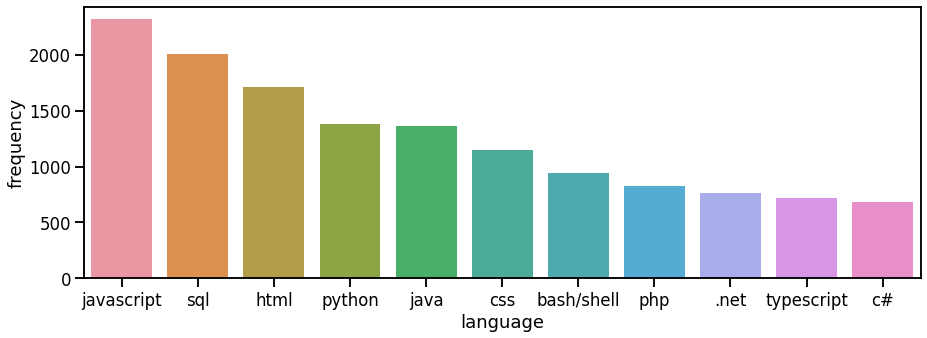

In [ ]:
fig = plt.figure(figsize=(15,5))
seaborn.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
seaborn.barplot(x="language", y="frequency", data=language_count_cut_off);


In [ ]:
filter_list=list(language_count_cut_off.language)
filter_list

['javascript',
 'sql',
 'html',
 'python',
 'java',
 'css',
 'bash/shell',
 'php',
 '.net',
 'typescript',
 'c#']

In [ ]:
# @title Extraemos las muestras que tienen los lenguajes filtrados

# Filter out languages that we want to exclude
# Complete here with your selected list. 
filtered_df_lang = df_lang[df_lang.programming_language.isin(filter_list)]

# print(filtered_df_lang[:5])
# print(filtered_df_lang.shape)

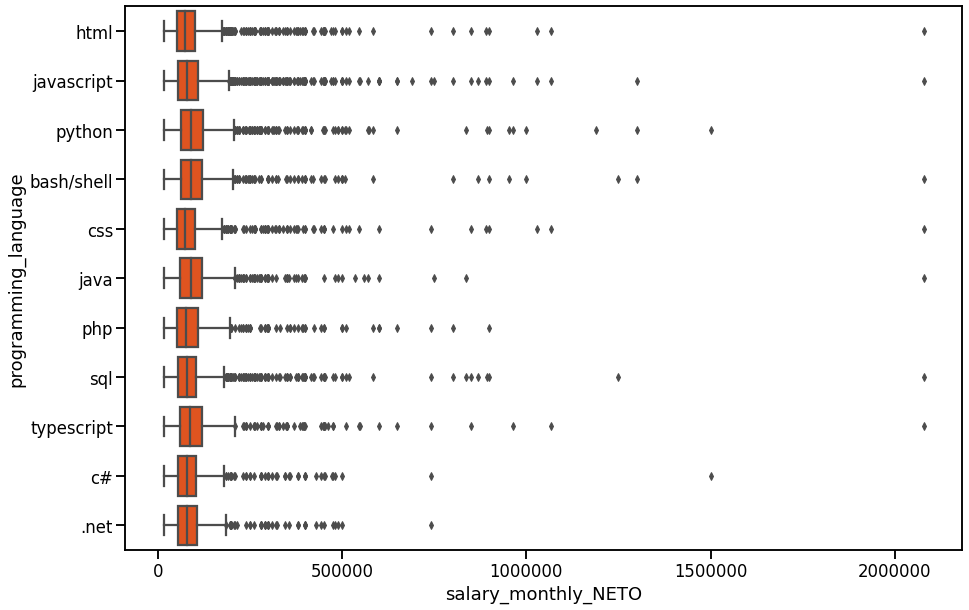

In [ ]:
plt.figure(figsize=(15, 10))

seaborn.boxplot(data=filtered_df_lang, x='salary_monthly_NETO', y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
# @title Descripción por lenguaje
df1=filtered_df_lang.groupby("programming_language").describe().reset_index()
df1=df1.set_index("programming_language")
df1.columns = df1.columns.droplevel()
df1.sort_values("count", inplace=True, ascending=False)
df1=df1.apply(np.int64)
df1



,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
javascript,2316,104301,105647,16475,55000,80260,110000,2080000
sql,2007,95720,93079,16000,54000,79000,105000,2080000
html,1714,95947,99388,16000,52000,75000,102354,2080000
python,1377,113893,109562,15600,64000,90000,122000,1500000
java,1360,102921,88393,15600,60172,89000,120000,2080000
css,1145,96467,108858,16000,52000,75000,102000,2080000
bash/shell,940,113238,124295,17900,63060,90000,120000,2080000
php,823,97612,88705,16475,51387,76894,110000,900000
.net,762,94015,70281,16600,56000,79500,107750,740000
